- 3 baseline sets: baseline, baseline_mdstotal, baseline_tdpigd (outcome measures only, motor MDS total, motor TD/PIGD)
- 4 standard sets: standard (outcome measures + demographics), standard_plus_treatment, standard_plus_treatment_genetic, standard_plus_treatment_imaging_CSF
- 1 expanded set: standard + treatment + other relevant features
- 1 questions set (questions in outcome measures + demographics)


In [1]:
import pickle, numpy as np, pandas as pd

In [2]:
baseline_datadir = '../../../datasets/ppmi/visit_feature_inputs_asof_2019Jan24_using_CMEDTM/'
baseline_filepath = baseline_datadir + 'PD_baseline.csv'
screening_filepath = baseline_datadir + 'PD_screening.csv'
questions_filepath = baseline_datadir + 'PD_questions_across_time.csv'
totals_filepath = baseline_datadir + 'PD_totals_across_time.csv'
other_filepath = baseline_datadir + 'PD_other_across_time.csv'
baseline_df = pd.read_csv(baseline_filepath)
screening_df = pd.read_csv(screening_filepath)
questions_df = pd.read_csv(questions_filepath)
totals_df = pd.read_csv(totals_filepath)
totals_df['STAI'] = np.where(np.logical_and(~pd.isnull(totals_df['STATE_ANXIETY']), \
                                            ~pd.isnull(totals_df['TRAIT_ANXIETY'])), \
                             totals_df[['STATE_ANXIETY','TRAIT_ANXIETY']].sum(axis=1), float('NaN'))
#totals_df.rename(columns={'NUPDRS3_untreated': 'NUPDRS3'}, inplace=True)
totals_df['NUPDRS23'] = totals_df[['NUPDRS2','NUPDRS3_untreated']].sum(axis=1)
sc_totals_df = totals_df.loc[totals_df['EVENT_ID_DUR']==0]
bl_totals_df = totals_df.loc[totals_df['EVENT_ID_DUR']==0.125]
other_df = pd.read_csv(other_filepath)
other_df['BMI'] = np.where(np.logical_and(~pd.isnull(other_df['WGTKG']), ~pd.isnull(other_df['HTCM'])), \
                           other_df['WGTKG']/(other_df['HTCM'])**2*10000., float('NaN'))
other_df.rename(columns={'TD_PIGD_untreated:posture': 'PIGD', 'TD_PIGD_untreated:tremor': 'TD'}, inplace=True)
sc_other_df = other_df.loc[other_df['EVENT_ID_DUR']==0]
bl_other_df = other_df.loc[other_df['EVENT_ID_DUR']==0.125]
treatment_filepath = '../../../datasets/ppmi/treatment_pipeline_output_asof_2019Jan24/PD_treatment_between_visits.csv'
treatment_df = pd.read_csv(treatment_filepath)
treatment_df = treatment_df.loc[treatment_df['EVENT_ID']=='SC']

In [3]:
subtotal_maps = {'NUPDRS3_TREMOR': ['NP3RTALL', 'NP3RTALU', 'NP3KTRML', 'NP3PTRML', 'NP3KTRMR', 'NP3PTRMR', 'NP3RTARU', \
                                    'NP3RTALJ', 'NP3RTARL', 'NP2TRMR', 'NP3RTCON'], \
                 'NUPDRS3_RIGID_LEFT': ['NP3RIGLU', 'NP3RIGLL', 'NP3PRSPL', 'NP3FTAPL', 'NP3HMOVL', 'NP3LGAGL', \
                                        'NP3TTAPL'], \
                 'NUPDRS3_RIGID_RIGHT': ['NP3RIGRL', 'NP3RIGRU', 'NP3PRSPR', 'NP3FTAPR', 'NP3HMOVR', 'NP3LGAGR', \
                                         'NP3TTAPR'], \
                 'NUPDRS3_FACE': ['NP3SPCH', 'NP3RIGN', 'NP3BRADY', 'NP3FACXP'], \
                 'NUPDRS3_GAIT': ['NP3FRZGT', 'NP3PSTBL', 'NP3RISNG', 'NP3GAIT', 'NP3POSTR'], \
                 'NUPDRS2_DAILYACT': ['NP2HWRT', 'NP2FREZ', 'NP2HYGN', 'NP2EAT', 'NP2HOBB', 'NP2WALK', 'NP2DRES', \
                                      'NP2RISE', 'NP2TURN', 'NP2SWAL', 'NP2SALV', 'NP2SPCH']
                }
for subtotal in subtotal_maps:
    untreated_components = []
    for col in subtotal_maps[subtotal]:
        if col.startswith('NP3'):
            questions_df.rename(columns={col + '_untreated': col}, inplace=True)
        untreated_components.append(col)
    questions_df[subtotal] = questions_df[untreated_components].sum(axis=1)
sc_questions_df = questions_df.loc[questions_df['EVENT_ID_DUR']==0]
bl_questions_df = questions_df.loc[questions_df['EVENT_ID_DUR']==0.125]

In [4]:
cognitive_totals = ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'HVLT_retent', 'BJLO', 'LNS', \
                    'SEMANTIC_FLUENCY']
cognitive_questions = ['NP1COG']
autonomic_totals = ['SCOPA-AUT']
autonomic_other = ['DIASUP', 'DIASTND', 'SYSSTND', 'SYSSUP', 'BMI']
autonomic_questions = ['NP1URIN', 'NP1LTHD', 'NP1FATG', 'NP1PAIN', 'NP1CNST']
autonomic_screening = ['MedHist_1i. gastrointestinal']
standard_other = ['GENETIC_RISK_SCORE', 'AGE']
standard_baseline = ['UPSIT', 'MALE']
standard_screening = ['DIS_DUR_BY_CONSENTDT']
psychiatric_baseline = ['RAWHITE']
psychiatric_totals = ['STAI','QUIP','GDSSHORT']
psychiatric_screening = ['MedHist_1q. psychiatric', 'PhysExam_Psychiatric']
psychiatric_questions = ['NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT']
sleep_totals = ['EPWORTH', 'REMSLEEP']
sleep_questions = ['NP1SLPN', 'NP1SLPD']
treatments = ['DIGESTIVE AID', 'SLEEP AID', 'ANTIDEPRESSANT', 'ANXIOLYTIC']
csf_other = ['PTAU_ABETA_ratio', 'TTAU_ABETA_ratio', 'PTAU_TTAU_ratio', 'ASYNU_log', 'TTAU_log', 'ABETA_log', \
             'PTAU_log']
imaging_other = ['count_density_ratio_ipsilateral', 'count_density_ratio_contralateral', \
                 'ipsilateral_caudate', 'ipsilateral_putamen', 'contralateral_caudate', 'contralateral_putamen', \
                 'asymmetry_index_caudate', 'asymmetry_index_putamen']
motor_questions = ['NHY']
motor_other = ['TD','PIGD']
motor_totals = ['NUPDRS23']

In [5]:
all_totals = cognitive_totals + autonomic_totals + psychiatric_totals + sleep_totals + motor_totals
all_questions = cognitive_questions + autonomic_questions + psychiatric_questions + subtotal_maps.keys() \
    + sleep_questions + motor_questions
all_screening = autonomic_screening + standard_screening + psychiatric_screening
all_other = autonomic_other + standard_other + csf_other + imaging_other + motor_other
all_baseline = standard_baseline + psychiatric_baseline

In [6]:
baseline = {'Motor': ['NUPDRS2_DAILYACT', 'NUPDRS3_GAIT', 'NUPDRS3_RIGID_RIGHT', 'NUPDRS3_FACE', 'NUPDRS3_TREMOR', \
                      'NUPDRS3_RIGID_LEFT'], \
            'Cognitive': ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'HVLT_retent', 'BJLO', 'LNS', \
                          'SEMANTIC_FLUENCY'], \
            'Autonomic': ['SCOPA-AUT'], \
            'Psychiatric': ['STAI', 'QUIP', 'GDSSHORT'], \
            'Sleep': ['EPWORTH', 'REMSLEEP'], \
            'Standard': []}

In [7]:
# only use motor result from this setting
baseline_mdstotal = {'Motor': ['NUPDRS23'], \
                     'Cognitive': ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'HVLT_retent', 'BJLO', 'LNS', \
                                   'SEMANTIC_FLUENCY'], \
                     'Autonomic': ['SCOPA-AUT'], \
                     'Psychiatric': ['STAI', 'QUIP', 'GDSSHORT'], \
                     'Sleep': ['EPWORTH', 'REMSLEEP'], \
                     'Standard': []}

In [8]:
# only use motor result from this setting
baseline_tdpigd = {'Motor': ['PIGD', 'TD'], \
                   'Cognitive': ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'HVLT_retent', 'BJLO', 'LNS', \
                                 'SEMANTIC_FLUENCY'], \
                   'Autonomic': ['SCOPA-AUT'], \
                   'Psychiatric': ['STAI', 'QUIP', 'GDSSHORT'], \
                   'Sleep': ['EPWORTH', 'REMSLEEP'], \
                   'Standard': []}

In [9]:
standard = {'Motor': ['NUPDRS2_DAILYACT', 'NUPDRS3_GAIT', 'NUPDRS3_RIGID_RIGHT', 'NUPDRS3_FACE', 'NUPDRS3_TREMOR', \
                      'NUPDRS3_RIGID_LEFT'], \
            'Cognitive': ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'HVLT_retent', 'BJLO', 'LNS', \
                          'SEMANTIC_FLUENCY'], \
            'Autonomic': ['SCOPA-AUT'], \
            'Psychiatric': ['STAI', 'QUIP', 'GDSSHORT'], \
            'Sleep': ['EPWORTH', 'REMSLEEP'], \
            'Standard': ['AGE', 'MALE', 'UPSIT', 'DIS_DUR_BY_CONSENTDT']}

In [10]:
standard_plus_treatment = {'Motor': ['NUPDRS2_DAILYACT', 'NUPDRS3_GAIT', 'NUPDRS3_RIGID_RIGHT', 'NUPDRS3_FACE', \
                                     'NUPDRS3_TREMOR', 'NUPDRS3_RIGID_LEFT'], \
                           'Cognitive': ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'HVLT_retent', 'BJLO', \
                                         'LNS', 'SEMANTIC_FLUENCY'], \
                           'Autonomic': ['SCOPA-AUT', 'DIGESTIVE AID'], \
                           'Psychiatric': ['STAI', 'QUIP', 'GDSSHORT', 'ANTIDEPRESSANT', 'ANXIOLYTIC'], \
                           'Sleep': ['EPWORTH', 'REMSLEEP', 'SLEEP AID'], \
                           'Standard': ['AGE', 'MALE', 'UPSIT', 'DIS_DUR_BY_CONSENTDT']}

In [11]:
csf_feats = ['PTAU_ABETA_ratio', 'TTAU_ABETA_ratio', 'PTAU_TTAU_ratio', 'ASYNU_log', 'TTAU_log', 'ABETA_log', \
             'PTAU_log']
imaging_feats = ['count_density_ratio_ipsilateral', 'count_density_ratio_contralateral', \
                 'ipsilateral_caudate', 'ipsilateral_putamen', 'contralateral_caudate', 'contralateral_putamen', \
                 'asymmetry_index_caudate', 'asymmetry_index_putamen']
standard_plus_treatment_imaging_CSF = {'Motor': ['NUPDRS2_DAILYACT', 'NUPDRS3_GAIT', 'NUPDRS3_RIGID_RIGHT', \
                                                 'NUPDRS3_FACE', 'NUPDRS3_TREMOR', 'NUPDRS3_RIGID_LEFT'], \
                                       'Cognitive': ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', \
                                                     'HVLT_retent', 'BJLO', 'LNS', 'SEMANTIC_FLUENCY'], \
                                       'Autonomic': ['SCOPA-AUT', 'DIGESTIVE AID'], \
                                       'Psychiatric': ['STAI', 'QUIP', 'GDSSHORT', 'ANTIDEPRESSANT', 'ANXIOLYTIC'], \
                                       'Sleep': ['EPWORTH', 'REMSLEEP', 'SLEEP AID'], \
                                       'Standard': ['AGE', 'MALE', 'UPSIT', 'DIS_DUR_BY_CONSENTDT'] \
                                            + csf_feats + imaging_feats}

In [12]:
standard_plus_treatment_imaging_CSF_expanded = {'Motor': ['NUPDRS2_DAILYACT', 'NUPDRS3_GAIT', 'NUPDRS3_RIGID_RIGHT', 'NUPDRS3_FACE', \
                      'NUPDRS3_TREMOR', 'NUPDRS3_RIGID_LEFT', 'NHY', 'TD', 'PIGD'], \
            'Cognitive': ['MOCA', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'HVLT_retent', 'BJLO', 'LNS', \
                          'SEMANTIC_FLUENCY', 'NP1COG'], \
            'Autonomic': ['SCOPA-AUT', 'MedHist_1i. gastrointestinal', 'DIASUP', 'DIASTND', 'SYSSTND', \
                          'SYSSUP', 'NP1URIN', 'NP1LTHD', 'NP1FATG', 'NP1PAIN', 'NP1CNST', 'BMI', \
                          'DIGESTIVE AID'], \
            'Psychiatric': ['STAI', 'QUIP', 'GDSSHORT', 'PhysExam_Psychiatric', 'RAWHITE', 'NP1HALL', \
                            'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'MedHist_1q. psychiatric', 'ANTIDEPRESSANT', \
                            'ANXIOLYTIC'], \
            'Sleep': ['EPWORTH', 'REMSLEEP', 'NP1SLPN', 'NP1SLPD', 'SLEEP AID'], \
            'Standard': ['AGE', 'MALE', 'UPSIT', 'DIS_DUR_BY_CONSENTDT'] + csf_feats + imaging_feats}

In [13]:
questions_plus_treatment_imaging_CSF_expanded \
    = {'Motor': ['NHY', 'TD', 'PIGD'], \
       'Cognitive': ['NP1COG'], \
       'Autonomic': ['MedHist_1i. gastrointestinal', 'DIASUP', 'DIASTND', 'SYSSTND', 'SYSSUP', 'NP1URIN', 'NP1LTHD', \
                     'NP1FATG', 'NP1PAIN', 'NP1CNST', 'BMI', 'DIGESTIVE AID'], \
       'Psychiatric': ['PhysExam_Psychiatric', 'RAWHITE', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', \
                       'MedHist_1q. psychiatric', 'ANTIDEPRESSANT', 'ANXIOLYTIC'], \
       'Sleep': ['NP1SLPN', 'NP1SLPD', 'SLEEP AID'], \
       'Standard': ['AGE', 'MALE', 'UPSIT', 'DIS_DUR_BY_CONSENTDT'] + csf_feats + imaging_feats}

In [14]:
for subtotal in subtotal_maps:
    questions_plus_treatment_imaging_CSF_expanded['Motor'] += subtotal_maps[subtotal]
questions_plus_treatment_imaging_CSF_expanded['Motor'].remove('NP3FRZGT')
bjlo_questions = ['BJLOT' + str(2*i+1) for i in range(15)]
moca_questions = []
lns_questions = []
semantic_fluency_questions = []
hvlt_questions = []
moca_exclude_set = {'MCACITY', 'MCAYR', 'MCACAMEL', 'MCAMONTH', 'MCAPLACE', 'MCALION', 'MCADAY'}
lns_exclude_set = {'LNS1A', 'LNS5A', 'LNS5B', 'LNS5C', 'LNS6A', 'LNS6B', 'LNS6C', 'LNS7A', 'LNS7B', 'LNS7C'}
for question in questions_df.columns:
    if question.startswith('MCA'):
        if question not in moca_exclude_set:
            moca_questions.append(question)
    elif question.startswith('LNS'):
        if question not in lns_exclude_set:
            lns_questions.append(question)
    elif question.startswith('VLT'):
        semantic_fluency_questions.append(question)
    elif question.startswith('HVLT'):
        hvlt_questions.append(question)
questions_plus_treatment_imaging_CSF_expanded['Cognitive'] += bjlo_questions + moca_questions + lns_questions \
    + semantic_fluency_questions + hvlt_questions
for question in questions_df.columns:
    if question.startswith('SCAU') and question != 'SCAU26D' and question != 'SCAU_catheter':
        questions_plus_treatment_imaging_CSF_expanded['Autonomic'].append(question)
gds_questions = []
stai_questions = []
quip_questions = ['TMGAMBLE', 'CNTRLSEX', 'TMSEX', 'TMBUY', 'CNTRLEAT', 'TMEAT', 'TMTORACT', \
                  'TMTMTACT', 'TMTRWD', 'TMDISMED', 'CNTRLDSM'] # 'CNTRLGMB', 'CNTRLBUY' removed for low variance
for question in questions_df.columns:
    if question.startswith('GDS'):
        gds_questions.append(question)
    elif question.startswith('STAI'):
        stai_questions.append(question)
questions_plus_treatment_imaging_CSF_expanded['Psychiatric'] += gds_questions + stai_questions + quip_questions
questions_plus_treatment_imaging_CSF_expanded['Sleep'] += ['DRMVIVID', 'DRMAGRAC', 'DRMNOCTB', 'SLPLMBMV', \
                                                           'SLPINJUR', 'DRMVERBL', 'DRMFIGHT', 'DRMUMV', \
                                                           'DRMOBJFL', 'MVAWAKEN', 'DRMREMEM', 'SLPDSTRB', 'STROKE', \
                                                           'HETRA', 'PARKISM', 'RLS', 'DEPRS', 'CNSOTH']
# 'NARCLPSY', 'EPILEPSY', 'BRNINFM' omitted due to low variance
for question in questions_df.columns:
    if question.startswith('ESS'):
        questions_plus_treatment_imaging_CSF_expanded['Sleep'].append(question)
all_questions += questions_plus_treatment_imaging_CSF_expanded['Motor'] \
    + questions_plus_treatment_imaging_CSF_expanded['Cognitive'] \
    + questions_plus_treatment_imaging_CSF_expanded['Autonomic'] \
    + questions_plus_treatment_imaging_CSF_expanded['Sleep'] \
    + questions_plus_treatment_imaging_CSF_expanded['Psychiatric']
all_questions = list(set(all_questions)) # remove duplicates

In [15]:
questions_plus_treatment_imaging_CSF_expanded_genetic = dict()
for category in questions_plus_treatment_imaging_CSF_expanded.keys():
    questions_plus_treatment_imaging_CSF_expanded_genetic[category] = []
    for feat in questions_plus_treatment_imaging_CSF_expanded[category]:
        questions_plus_treatment_imaging_CSF_expanded_genetic[category].append(feat)
questions_plus_treatment_imaging_CSF_expanded_genetic['Standard'].append('GENETIC_RISK_SCORE')

In [16]:
questions_plus_treatment_imaging_CSF_expanded

{'Autonomic': ['MedHist_1i. gastrointestinal',
  'DIASUP',
  'DIASTND',
  'SYSSTND',
  'SYSSUP',
  'NP1URIN',
  'NP1LTHD',
  'NP1FATG',
  'NP1PAIN',
  'NP1CNST',
  'BMI',
  'DIGESTIVE AID',
  'SCAU_sexNA',
  'SCAU21',
  'SCAU26C',
  'SCAU26B',
  'SCAU26A',
  'SCAU19',
  'SCAU18',
  'SCAU15',
  'SCAU14',
  'SCAU17',
  'SCAU16',
  'SCAU10',
  'SCAU13',
  'SCAU12',
  'SCAU9',
  'SCAU1',
  'SCAU11',
  'SCAU8',
  'SCAU5',
  'SCAU4',
  'SCAU7',
  'SCAU6',
  'SCAU3',
  'SCAU2',
  'SCAU23A',
  'SCAU20',
  'SCAU22',
  'SCAU23',
  'SCAU24',
  'SCAU25'],
 'Cognitive': ['NP1COG',
  'BJLOT1',
  'BJLOT3',
  'BJLOT5',
  'BJLOT7',
  'BJLOT9',
  'BJLOT11',
  'BJLOT13',
  'BJLOT15',
  'BJLOT17',
  'BJLOT19',
  'BJLOT21',
  'BJLOT23',
  'BJLOT25',
  'BJLOT27',
  'BJLOT29',
  'MCARHINO',
  'MCADATE',
  'MCAVF',
  'MCAFDS',
  'MCAREC1',
  'MCAREC2',
  'MCAREC3',
  'MCAREC4',
  'MCAREC5',
  'MCAVIGIL',
  'MCACLCKN',
  'MCACLCKH',
  'MCACLCKC',
  'MCAALTTM',
  'MCASER7',
  'MCASNTNC',
  'MCABDS',
  'MCAABSTR

In [17]:
questions_plus_treatment_imaging_CSF_expanded_genetic

{'Autonomic': ['MedHist_1i. gastrointestinal',
  'DIASUP',
  'DIASTND',
  'SYSSTND',
  'SYSSUP',
  'NP1URIN',
  'NP1LTHD',
  'NP1FATG',
  'NP1PAIN',
  'NP1CNST',
  'BMI',
  'DIGESTIVE AID',
  'SCAU_sexNA',
  'SCAU21',
  'SCAU26C',
  'SCAU26B',
  'SCAU26A',
  'SCAU19',
  'SCAU18',
  'SCAU15',
  'SCAU14',
  'SCAU17',
  'SCAU16',
  'SCAU10',
  'SCAU13',
  'SCAU12',
  'SCAU9',
  'SCAU1',
  'SCAU11',
  'SCAU8',
  'SCAU5',
  'SCAU4',
  'SCAU7',
  'SCAU6',
  'SCAU3',
  'SCAU2',
  'SCAU23A',
  'SCAU20',
  'SCAU22',
  'SCAU23',
  'SCAU24',
  'SCAU25'],
 'Cognitive': ['NP1COG',
  'BJLOT1',
  'BJLOT3',
  'BJLOT5',
  'BJLOT7',
  'BJLOT9',
  'BJLOT11',
  'BJLOT13',
  'BJLOT15',
  'BJLOT17',
  'BJLOT19',
  'BJLOT21',
  'BJLOT23',
  'BJLOT25',
  'BJLOT27',
  'BJLOT29',
  'MCARHINO',
  'MCADATE',
  'MCAVF',
  'MCAFDS',
  'MCAREC1',
  'MCAREC2',
  'MCAREC3',
  'MCAREC4',
  'MCAREC5',
  'MCAVIGIL',
  'MCACLCKN',
  'MCACLCKH',
  'MCACLCKC',
  'MCAALTTM',
  'MCASER7',
  'MCASNTNC',
  'MCABDS',
  'MCAABSTR

In [18]:
selected_df = baseline_df[['PATNO']+all_baseline].merge(screening_df[['PATNO']+all_screening], how='outer', \
                                                        validate='one_to_one')
selected_df = selected_df.merge(sc_totals_df[['PATNO']+all_totals], how='outer', validate='one_to_one')
selected_df = selected_df.merge(bl_totals_df[['PATNO']+all_totals], on=['PATNO'], how='outer', \
                                suffixes=['_sc', '_bl'], validate='one_to_one')
selected_df = selected_df.merge(sc_questions_df[['PATNO']+all_questions], on=['PATNO'], how='outer', \
                                validate='one_to_one')
selected_df = selected_df.merge(bl_questions_df[['PATNO']+all_questions], on=['PATNO'], how='outer', \
                                suffixes=['_sc', '_bl'], validate='one_to_one')
selected_df = selected_df.merge(sc_other_df[['PATNO']+all_other], on=['PATNO'], how='outer', validate='one_to_one')
selected_df = selected_df.merge(bl_other_df[['PATNO']+all_other], on=['PATNO'], how='outer', \
                                suffixes=['_sc', '_bl'], validate='one_to_one')
for total_col in all_totals + all_questions + all_other:
    bl_col_df = selected_df[[total_col + '_bl']]
    del selected_df[total_col + '_bl']
    selected_df.rename(columns={total_col + '_sc': total_col}, inplace=True)
    bl_col_df.rename(columns={total_col + '_bl': total_col}, inplace=True)
    selected_df.update(bl_col_df, overwrite=False)
selected_df = selected_df.merge(treatment_df[['PATNO'] + treatments], how='left', validate='one_to_one')
selected_df[treatments].fillna(0, inplace=True)

KeyError: "['MedHist_1q. psychiatric', 'PIGD', 'RAWHITE', 'MedHist_1i. gastrointestinal', 'BMI', 'DIASUP', 'SLEEP AID', 'ANTIDEPRESSANT', 'DIGESTIVE AID', 'SYSSTND', 'PhysExam_Psychiatric', 'SYSSUP', 'ANXIOLYTIC', 'DIASTND', 'TD'] not in index"

In [19]:
# for SCOPA-AUT sexual dysfunction, impute 0 for opposite gender questions
selected_df['SCAU22'] = np.where(selected_df['MALE']==0, 0, selected_df['SCAU22'])
selected_df['SCAU23'] = np.where(selected_df['MALE']==0, 0, selected_df['SCAU23'])
selected_df['SCAU23A'] = np.where(selected_df['MALE']==0, 0, selected_df['SCAU23A'])
selected_df['SCAU24'] = np.where(selected_df['MALE']==1, 0, selected_df['SCAU24'])
selected_df['SCAU25'] = np.where(selected_df['MALE']==1, 0, selected_df['SCAU25'])

KeyError: 'SCAU22'

In [18]:
all_covariate_sets = {'baseline': baseline, \
                      'baseline_mdstotal': baseline_mdstotal, \
                      'baseline_tdpigd': baseline_tdpigd, \
                      'standard': standard, \
                      'standard_plus_treatment': standard_plus_treatment, \
                      'standard_plus_treatment_imaging_CSF': standard_plus_treatment_imaging_CSF, \
                      'standard_plus_treatment_imaging_CSF_expanded': standard_plus_treatment_imaging_CSF_expanded, \
                      'questions_plus_treatment_imaging_CSF_expanded': questions_plus_treatment_imaging_CSF_expanded, \
                      'questions_plus_treatment_imaging_CSF_expanded_genetic': \
                      questions_plus_treatment_imaging_CSF_expanded_genetic}

In [10]:
outcome_filepath = '../ppmi_survival_models/survival_outcome_subtotals_gdsfixed_using_CMEDTM/set_3.0_0.5_2019Jul08/' \
    + 'cohorts_time_event_dict.pkl'
with open(outcome_filepath, 'r') as f:
    outcome_df = pickle.load(f)['PD']

In [20]:
test_patnos_dict = dict()
standard_covariate_union = set()
for cov_set in all_covariate_sets.values():
    standard_covariate_union = standard_covariate_union.union(cov_set['Standard'])
outcomes = ['Motor', 'Autonomic', 'Cognitive', 'Psychiatric', 'Sleep']
hybrid_covariate_set = set()
union_of_covariate_sets = dict()
for outcome in outcomes:
    union_covariate_set = set()
    for cov_set in all_covariate_sets.values():
        union_covariate_set = union_covariate_set.union(cov_set[outcome])
    hybrid_covariate_set = hybrid_covariate_set.union(union_covariate_set)
    union_covariate_set = union_covariate_set.union(standard_covariate_union)
    union_of_covariate_sets[outcome] = union_covariate_set
    outcome_nonzero_df = outcome_df.loc[outcome_df[outcome + '_T'] > 0]
    merged_df = outcome_nonzero_df.merge(selected_df, on=['PATNO'], suffixes=(False,False), validate='one_to_one')
    nomissing_patnos = merged_df.dropna(subset=list(union_covariate_set)).PATNO.values
    np.random.shuffle(nomissing_patnos)
    test_patnos_dict[outcome] = nomissing_patnos[int(.8*len(nomissing_patnos)):]
    print(outcome + ': ' + str(len(test_patnos_dict[outcome])))
hybrid_covariate_set = hybrid_covariate_set.union(standard_covariate_union)
outcome_nonzero_df = outcome_df.loc[outcome_df['hybrid_requiremotor_T'] > 0]
merged_df = outcome_nonzero_df.merge(selected_df, on=['PATNO'], suffixes=(False,False), validate='one_to_one')
nomissing_patnos = merged_df.dropna(subset=list(hybrid_covariate_set)).PATNO.values
np.random.shuffle(nomissing_patnos)
test_patnos_dict['hybrid_requiremotor'] = nomissing_patnos[int(.8*len(nomissing_patnos)):]
print('hybrid_requiremotor: ' + str(len(test_patnos_dict['hybrid_requiremotor'])))
union_of_covariate_sets['hybrid_requiremotor'] = hybrid_covariate_set

Motor: 63
Autonomic: 59
Cognitive: 65
Psychiatric: 59
Sleep: 67
hybrid_requiremotor: 54


In [21]:
selected_col_set = set(selected_df.columns.values.tolist())
print(hybrid_covariate_set.difference(selected_col_set))
print(selected_col_set.difference(hybrid_covariate_set))

set([])
set(['PATNO'])


In [109]:
#selected_df.to_csv('final_survival_baseline_data.csv', index=False) # should be same

In [23]:
#with open('final_test_patnos_dict.pkl', 'w') as f: # should be same
#    pickle.dump(test_patnos_dict, f)

In [19]:
with open('final_all_covariate_sets.pkl', 'w') as f:
    pickle.dump(all_covariate_sets, f)

In [25]:
# shouldn't need any of the below
human_readable_dict = {'UPSIT': 'UPSIT (smell)', 'MALE': 'Male', 'RAWHITE': 'White', \
                       'MedHist_1i. gastrointestinal': 'Gastrointestinal history', \
                       'DIS_DUR_BY_CONSENTDT': 'Disease duration', 'MedHist_1q. psychiatric': 'Pyschiatric history', \
                       'PhysExam_Psychiatric': 'Psychiatric current', 'MOCA': 'MoCA (cognitive)', \
                       'HVLT_discrim_recog': 'HVLT discrim recog', 'HVLT_immed_recall': 'HVLT immed recall', \
                       'HVLT_retent': 'HVLT retention', 'BJLO': 'BJLO (cognitive)', 'LNS': 'LNS (cognitive)', \
                       'SEMANTIC_FLUENCY': 'Semantic fluency', 'SCOPA-AUT': 'SCOPA-autonomic', \
                       'STAI': 'STAI (anxiety)', 'QUIP': 'QUIP (impulsive)', 'GDSSHORT': 'GDS (depression)', \
                       'EPWORTH': 'Epworth (sleep)', 'REMSLEEP': 'REM sleep', 'NP1COG': 'MDS1 cognitive', \
                       'NP1URIN': 'MDS1 urinary', 'NP1LTHD': 'MDS1 light-headed', 'NP1FATG': 'MDS1 fatigue', \
                       'NP1PAIN': 'MDS1 pain', 'NP1CNST': 'MDS1 constipation', 'NP1HALL': 'MDS1 hallucinations', \
                       'NP1DPRS': 'MDS1 depression', 'NP1ANXS': 'MDS1 anxiety', 'NP1APAT': 'MDS1 apathy', \
                       'NUPDRS2_DAILYACT': 'MDS2 daily activities', 'NUPDRS3_GAIT': 'MDS3 gait', \
                       'NUPDRS3_RIGID_RIGHT': 'MDS3 right rigidity', 'NUPDRS3_FACE': 'MDS3 face', \
                       'NUPDRS3_TREMOR': 'MDS2+3 tremor', 'NUPDRS3_RIGID_LEFT': 'MDS3 left rigidity', \
                       'NP1SLPN': 'MDS1 night-time sleep', 'NP1SLPD': 'MDS1 daytime sleep', 'NHY': 'Hoehn & Yahr', \
                       'DIASUP': 'Supine diastolic BP', 'DIASTND': 'Standing diastolic BP', \
                       'SYSSTND': 'Standing systolic BP', 'SYSSUP': 'Supine systolic BP', 'BMI': 'Body mass index', \
                       'GENETIC_RISK_SCORE': 'Genetic risk score', 'AGE': 'Age', 'NUPDRS23': 'MDS2+3 total', \
                       
                       'PTAU_ABETA_ratio': 'pTau-to-Abeta ratio', 'TTAU_ABETA_ratio': 'tTau-to-Abeta ratio', \
                       'PTAU_TTAU_ratio': 'pTau-to-tTau ratio', 'ASYNU_log': 'Alpha-synuclein (log)', \
                       'TTAU_log': 'tTau (log)', 'ABETA_log': 'Abeta (log)', 'PTAU_log': 'pTau (log)', \
                       
                       'count_density_ratio_ipsilateral': 'ipsilateral count density ratio', \
                       'count_density_ratio_contralateral': 'contralateral count density ratio', \
                       'ipsilateral_caudate': 'ipsilateral caudate', 'ipsilateral_putamen': 'ipsilateral putamen', \
                       'contralateral_caudate': 'contralateral caudate', \
                       'contralateral_putamen': 'contralateral putamen', \
                       'asymmetry_index_caudate': 'caudate asymmetry index', \
                       'asymmetry_index_putamen': 'putamen asymmetry index', \
                       
                       'DIGESTIVE AID': 'Digestive aid', 'SLEEP AID': 'Sleep aid',
                       'ANTIDEPRESSANT': 'Antidepressant', 'ANXIOLYTIC': 'Anxiolytic', \
                       
                       'NP2DRES': 'MDS 2.5 dressing', 'NP2EAT': 'MDS 2.4 eating tasks', \
                       'NP2HYGN': 'MDS 2.6 hygiene', 'NP2WALK': 'MDS 2.12 walking and balance', \
                       'NP2HOBB': 'MDS 2.8 hobbies and other activities', \
                       'NP2RISE': 'MDS 2.11 getting out of bed/car/deep chair', \
                       'NP2TURN': 'MDS 2.9 turning in bed', 'NP2SALV': 'MDS 2.2 saliva and drooling', \
                       'NP2FREZ': 'MDS 2.13 freezing', 'NP2HWRT': 'MDS 2.7 handwriting', \
                       'NP2SPCH': 'MDS 2.1 speech', 'NP2TRMR': 'MDS 2.10 tremor', \
                       'NP2SWAL': 'MDS 2.3 chewing and swallowing',\
                       
                       'NP3RIGLU': 'MDS 3.3 rigidity upper left', 'NP3FACXP': 'MDS 3.2 facial expression', \
                       'NP3RIGRL': 'MDS 3.3 rigidity right lower', \
                       'NP3KTRML': 'MDS 3.16 kinetic tremor left hand', \
                       'NP3FTAPR': 'MDS 3.4 finger tapping right', \
                       'NP3RTCON': 'MDS 3.18 rest tremor constancy', \
                       'NP3PRSPL': 'MDS 3.6 pronation-supination left hand', \
                       'NP3SPCH': 'MDS 3.1 speech', 'NP3RTALJ': 'MDS 3.17 rest tremor amplitude lip/jaw', \
                       'NP3LGAGR': 'MDS 3.8 leg agility right', 'NP3HMOVR': 'MDS 3.5 hand movements right', \
                       'NP3RISNG': 'MDS 3.9 arising from chair', \
                       'NP3RTALU': 'MDS 3.17 rest tremor amplitude left upper', \
                       'NP3FTAPL': 'MDS 3.4 finger tapping left', \
                       'NP3RTALL': 'MDS 3.17 rest tremor amplitude left lower', \
                       'NP3RIGRU': 'MDS 3.3 rigidity right upper', 'NP3TTAPL': 'MDS 3.7 toe tapping left', \
                       'NP3PSTBL': 'MDS 3.12 postural stability', \
                       'NP3RTARL': 'MDS 3.17 rest tremor amplitude right lower', \
                       'NP3BRADY': 'MDS 3.14 global spontaneity of movement/body bradykinesia', \
                       'NP3RTARU': 'MDS 3.17 rest tremor amplitude right upper', \
                       'NP3PRSPR': 'MDS 3.6 pronation-supination right hand', \
                       'NP3RIGN': 'MDS 3.3 rigidity neck', 'NP3RIGLL': 'MDS 3.3 rigidity lower left', \
                       'NP3PTRML': 'MDS 3.15 postural tremor left hand', \
                       'NP3TTAPR': 'MDS 3.7 toe tapping right', 'NP3LGAGL': 'MDS 3.8 leg agility left', \
                       'NP3HMOVL': 'MDS 3.5 hand movements left', 'NP3GAIT': 'MDS 3.10 gait', \
                       'NP3PTRMR': 'MDS 3.15 postural tremor right hand', \
                       'NP3KTRMR': 'MDS 3.16 kinetic tremor right hand', \
                       'NP3POSTR': 'MDS 3.13 posture', 'NP3FRZGT': 'MDS 3.11 freezing of gait', \
                       
                       'MCARHINO': 'MoCA name rhino', 'MCADATE': 'MoCA today\'s date', \
                       'MCADAY': 'MoCA today\'s day', 'MCAVF': 'MoCA words starting with F', \
                       'MCAFDS': 'MoCA repeat numbers forward', 'MCAPLACE': 'MoCA name of place', \
                       'MCAREC1': 'MoCA recall word 1', 'MCAREC2': 'MoCA recall word 2', \
                       'MCAREC3': 'MoCA recall word 3', 'MCAREC4': 'MoCA recall word 4', \
                       'MCAREC5': 'MoCA recall word 5', 'MCAVIGIL': 'MoCA tap foot on A', \
                       'MCACLCKN': 'MoCA clock numbers', 'MCACLCKH': 'MoCA clock hands', \
                       'MCACLCKC': 'MoCA clock contour', 'MCAALTTM': 'MoCA connect 1 to A to 2...', \
                       'MCACITY': 'MoCA name of city', 'MCASER7': 'MoCA subtract 7 series', \
                       'MCALION': 'MoCA name lion', 'MCABDS': 'MoCA repeat numbers backward', \
                       'MCAABSTR': 'MoCA abstraction', 'MCACAMEL': 'MoCA name camel', \
                       'MCACUBE': 'MoCA copy cube', 'MCAYR': 'MoCA today\'s year', \
                       'MCASNTNC': 'MoCA repeat sentences', 'MCAMONTH': 'MoCA today\'s month', \
                       
                       'VLTANIM': 'Semantic fluency (animals)', 'VLTVEG': 'Semantic fluency (vegetables)', \
                       'VLTFRUIT': 'Semantic fluency (fruits)', \
                       
                       'HVLTFPRL': 'HVLT false positive related', 'HVLTFPUN': 'HVLT false positive unrelated', \
                       'HVLTRT3': 'HVLT retention 3', 'HVLTRT2': 'HVLT retention 2', 'HVLTRT1': 'HVLT retention 1', \
                       'HVLTRDLY': 'HVLT delayed recall', 'HVLTREC': 'HVLT recognition', \
                       
                       'GDSAFRAD': 'GDS afraid bad happen', 'GDSHOPLS': 'GDS hopeless', 'GDSHLPLS': 'GDS helpless', \
                       'GDSHAPPY': 'GDS happy', 'GDSBORED': 'GDS bored', 'GDSMEMRY': 'GDS memory problems', \
                       'GDSSATIS': 'GDS satisfied with life', 'GDSEMPTY': 'GDS empty life', \
                       'GDSBETER': 'GDS most better off than self', 'GDSGSPIR': 'GDS good spirits', \
                       'GDSENRGY': 'GDS full of energy', 'GDSDROPD': 'GDS dropped interests', \
                       'GDSWRTLS': 'GDS feel worthless', 'GDSHOME': 'GDS prefer stay home', \
                       'GDSALIVE': 'GDS wonderful alive', \
                       
                       'TMGAMBLE': 'QUIP too much gambling', 'CNTRLGMB': 'QUIP can\'t control gambling', \
                       'TMSEX': 'QUIP too much sex behaviors', \
                       'CNTRLSEX': 'QUIP think too much about sex behaviors', 'TMBUY': 'QUIP too much buying', \
                       'CNTRLBUY': 'QUIP activities to continue buying', \
                       'TMEAT': 'QUIP too much eating behaviors', \
                       'CNTRLEAT': 'QUIP distressed about eating behaviors', \
                       'TMTORACT': 'QUIP too much time on specific activities', \
                       'TMTMTACT': 'QUIP too much time repeating simple motor activities', \
                       'TMTRWD': 'QUIP too much time walk/drive w/o goal', \
                       'TMDISMED': 'QUIP too much PD med use', \
                       'CNTRLDSM': 'QUIP can\'t control PD med use', \
                       
                       'STAIAD1': 'STAI 1 calm', 'STAIAD2': 'STAI 2 secure', 'STAIAD3': 'STAI 3 tense', \
                       'STAIAD4': 'STAI 4 strained', 'STAIAD5': 'STAI 5 at ease', 'STAIAD6': 'STAI 6 upset', \
                       'STAIAD7': 'STAI 7 worry possible misfortunes', 'STAIAD8': 'STAI 8 satisfied', \
                       'STAIAD9': 'STAI 9 frightened', 'STAIAD10': 'STAI 10 comfortable', \
                       'STAIAD11': 'STAI 11 self-confident', 'STAIAD12': 'STAI 12 nervous', \
                       'STAIAD13': 'STAI 13 jittery', 'STAIAD14': 'STAI 14 indecisive', \
                       'STAIAD15': 'STAI 15 relaxed', 'STAIAD16': 'STAI 16 content', \
                       'STAIAD17': 'STAI 17 worried', 'STAIAD18': 'STAI 18 confused', 'STAIAD19': 'STAI 19 steady', \
                       'STAIAD20': 'STAI 20 pleasant', 'STAIAD21': 'STAI 21 pleasant', \
                       'STAIAD22': 'STAI 22 nervous + restless', 'STAIAD23': 'STAI 23 satisfied with myself', \
                       'STAIAD24': 'STAI 24 wish could be happy', 'STAIAD25': 'STAI 25 feel like failure', \
                       'STAIAD26': 'STAI 26 rested', 'STAIAD27': 'STAI 27 calm/cool/collected', \
                       'STAIAD28': 'STAI 28 can\'t overcome difficulties', \
                       'STAIAD29':  'STAI 29 worry too much over trivial', 'STAIAD30': 'STAI 30 happy', \
                       'STAIAD31': 'STAI 31 disturbing thoughts', 'STAIAD32': 'STAI 32 lack self-confidence', \
                       'STAIAD33': 'STAI 33 secure', 'STAIAD34': 'STAI 34 make decisions easily', \
                       'STAIAD35': 'STAI 35 inadequate', 'STAIAD36': 'STAI 36 content', \
                       'STAIAD37': 'STAI 37 unimportant thought bothers me', \
                       'STAIAD38': 'STAI 38 feel disappointments strongly', 'STAIAD39': 'STAI steady', \
                       'STAIAD40': 'STAI 40 tension/turmoil', \
                       
                       'DRMVIVID': 'vivid dreams (REM 1)', 'DRMAGRAC': 'aggressive/action dreams (REM 2)', \
                       'DRMNOCTB': 'dream contents match nocturnal behavior (REM 3)', \
                       'SLPLMBMV': 'arms/legs move in sleep (REM 4)', \
                       'SLPINJUR': 'injured self/partner in sleep (REM 5)', \
                       'DRMVERBL': 'speak in dreams (REM 6.1)', 'DRMFIGHT': 'sudden move in dreams (REM 6.2)', \
                       'DRMUMV': 'gestures in dreams (REM 6.3)', \
                       'DRMOBJFL': 'things near bed fall in dreams (REM 6.4)', \
                       'MVAWAKEN': 'movements wake patient (REM 7)', 'DRMREMEM': 'remember dreams (REM 8)', \
                       'SLPDSTRB': 'disturbed sleep (REM 9)', 'STROKE': 'had stroke (REM 10.a)', \
                       'HETRA': 'had head trauma (REM 10.b)', 'PARKISM': 'had parkinsonism (REM 10.c)', \
                       'RLS': 'had restless leg syndrome (REM 10.d)', 'NARCLPSY': 'had narcolepsy (REM 10.e)', \
                       'DEPRS': 'had depression (REM 10.f)', 'EPILEPSY': 'had epilepsy (REM 10.g)', \
                       'BRNINFM': 'had brain inflammation (REM 10.h)', \
                       'CNSOTH': 'had other nervous system disease (REM 10.i)', \
                       
                       'ESS1': 'sleep when sit + read', 'ESS2': 'sleep when watch TV', \
                       'ESS3': 'sleep when sit in public', 'ESS4': 'sleep on car for 1hr', \
                       'ESS5': 'sleep afternoon lie down', 'ESS6': 'sleep when talk', \
                       'ESS7': 'sleep after lunch', 'ESS8': 'sleep on stopped car', \
                       
                       'SCAU1': 'SCOPA swallow difficult/choke', 'SCAU2': 'SCOPA drool', \
                       'SCAU3': 'SCOPA food stuck', 'SCAU4': 'SCOPA full quickly', 'SCAU5': 'SCOPA constipation', \
                       'SCAU6': 'SCOPA strain pass stool', 'SCAU7': 'SCOPA involuntary stool', \
                       'SCAU8': 'SCOPA difficult retain urine', 'SCAU9': 'SCOPA involuntary urine', \
                       'SCAU10': 'SCOPA can\'t completely empty bladder', \
                       'SCAU11': 'SCOPA urine weak', 'SCAU12': 'SCOPA urine again w/in 2hrs', \
                       'SCAU13': 'SCOPA urine at night', 'SCAU14': 'SCOPA lightheaded upon standing', \
                       'SCAU15': 'SCOPA lightheaded after stand some time', 'SCAU16': 'SCOPA fainted past 6 months', \
                       'SCAU17': 'SCOPA sweat excess daytime', 'SCAU18': 'SCOPA sweat excess nighttime', \
                       'SCAU19': 'SCOPA light-sensitive', 'SCAU20': 'SCOPA intolerant of cold', \
                       'SCAU21': 'SCOPA intolerant of heat', 'SCAU22': 'SCOPA male impotent', \
                       'SCAU23': 'SCOPA male unable ejaculate', 'SCAU23A': 'SCOPA male erection disorder med', \
                       'SCAU24': 'SCOPA female dry vagina', 'SCAU25': 'SCOPA female orgasm difficult', \
                       'SCAU26A': 'SCOPA constipation med', 'SCAU26B': 'SCOPA urine med', \
                       'SCAU26C': 'SCOPA blood pressure med', 'SCAU_catheter': 'SCOPA use catheter', \
                       'SCAU_sexNA': 'SCOPA sex not applicable', \
                      
                       'TD': 'Tremor dominant', 'PIGD': 'Postural instability gait dominant'}

In [26]:
human_readable_feats = set(human_readable_dict.keys())
for feat in hybrid_covariate_set:
    if feat.startswith('BJLOT'):
        human_readable_dict[feat] = 'BJLO' + feat[5:]
    elif feat.startswith('LNS'):
        human_readable_dict[feat] = 'LNS ' + feat[3:]
human_readable_feats = set(human_readable_dict.keys())
print(hybrid_covariate_set.difference(human_readable_feats))
print(human_readable_feats.difference(hybrid_covariate_set))

set([])
set([])


In [27]:
#with open('final_human_readable_feat_dict.pkl', 'w') as f:
#    pickle.dump(human_readable_dict, f)

Motor
311 patients included and 69 patients excluded due to missing baseline covariates
Among included patients, 0.6013 observed with 1.8398 (1.4988) years to observation and 4.7782 (1.8756) years to censoring
Among excluded patients, 0.4928 observed with 1.8015 (1.7217) years to observation and 4.3893 (2.3024) years to censoring


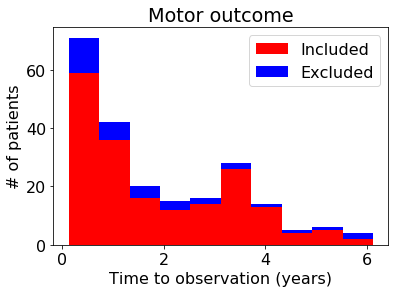

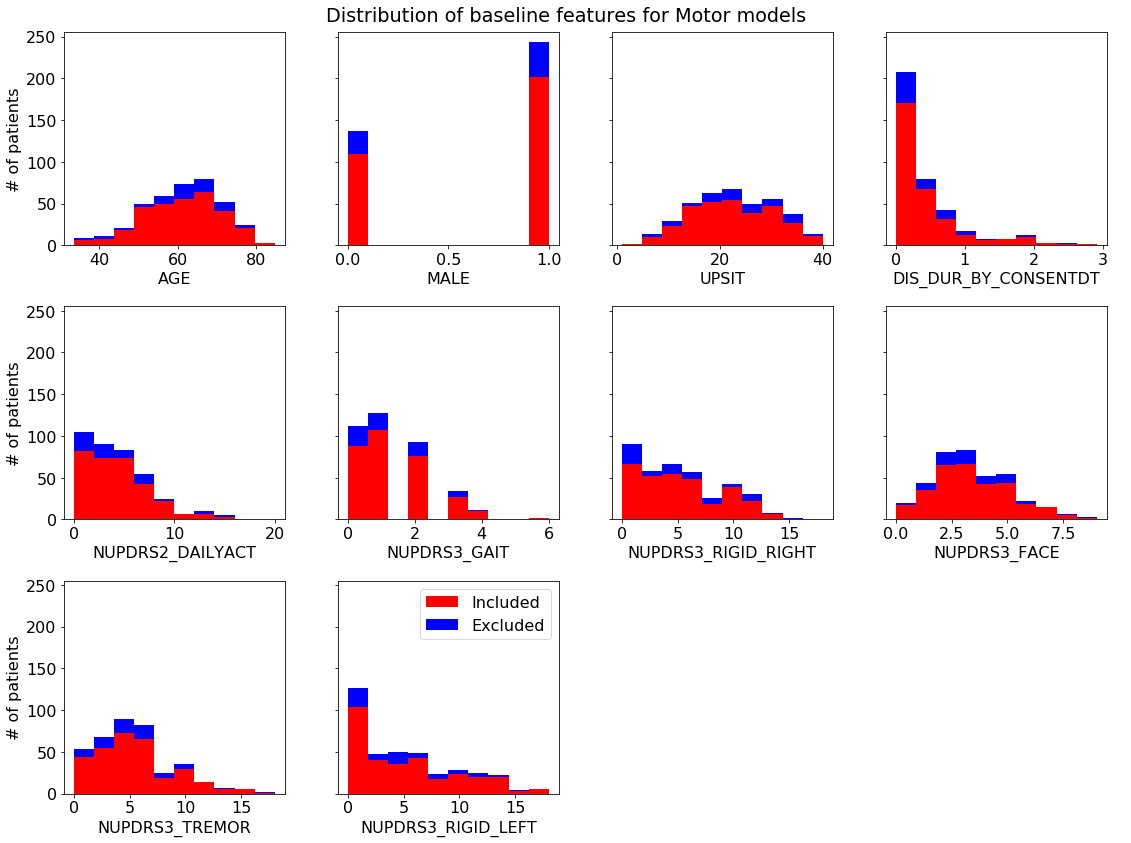

Autonomic
291 patients included and 127 patients excluded due to missing baseline covariates
Among included patients, 0.6426 observed with 1.2161 (1.5693) years to observation and 4.5865 (1.9554) years to censoring
Among excluded patients, 0.5591 observed with 1.4630 (1.6075) years to observation and 4.7655 (2.1017) years to censoring


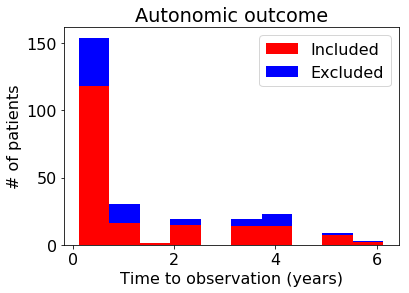

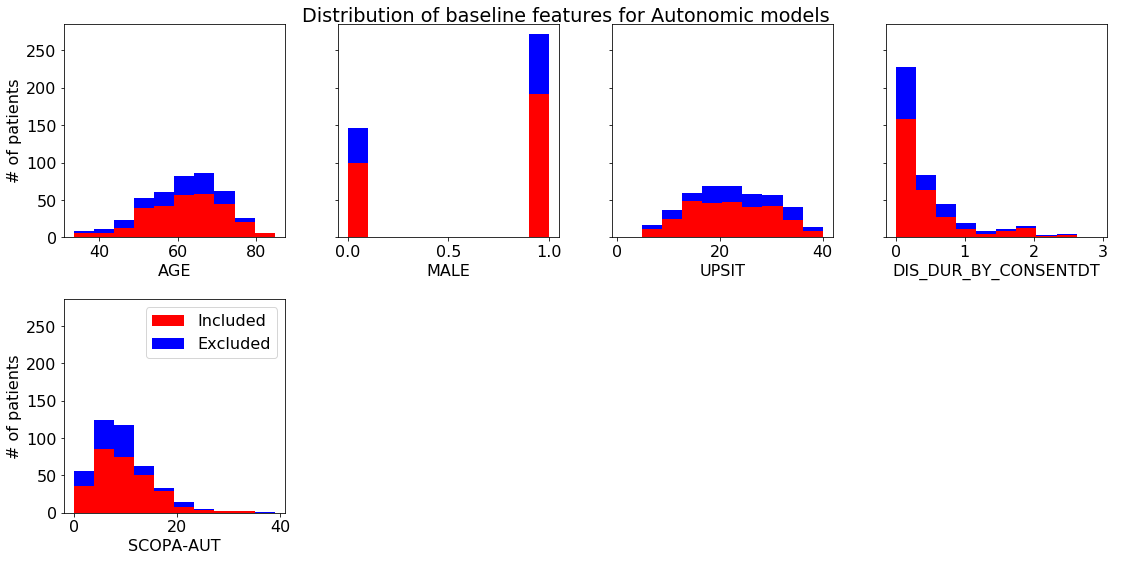

Cognitive
322 patients included and 75 patients excluded due to missing baseline covariates
Among included patients, 0.2516 observed with 1.7299 (1.7297) years to observation and 5.2578 (1.7026) years to censoring
Among excluded patients, 0.2533 observed with 1.1250 (1.4530) years to observation and 5.1421 (1.7131) years to censoring


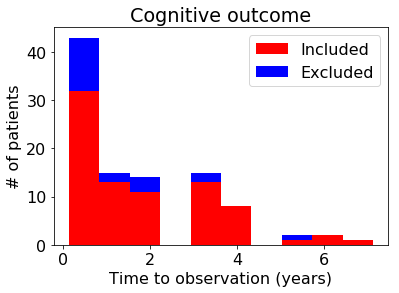

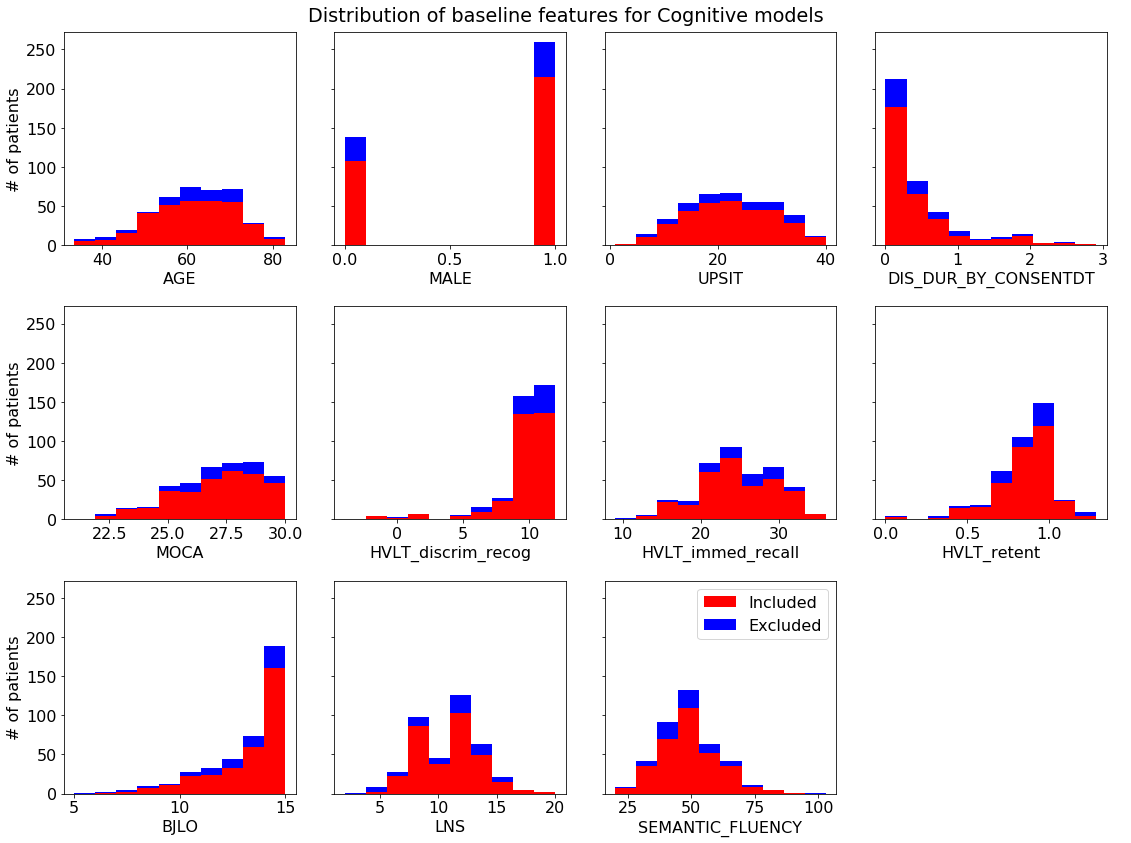

Psychiatric
291 patients included and 124 patients excluded due to missing baseline covariates
Among included patients, 0.7354 observed with 2.1665 (2.0721) years to observation and 3.3680 (1.8452) years to censoring
Among excluded patients, 0.7742 observed with 2.6246 (2.1318) years to observation and 3.7946 (1.6819) years to censoring


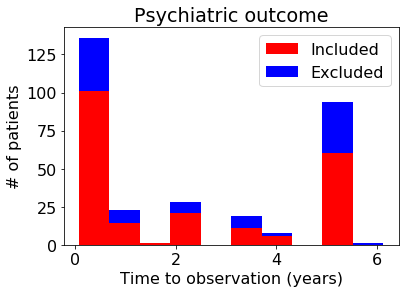

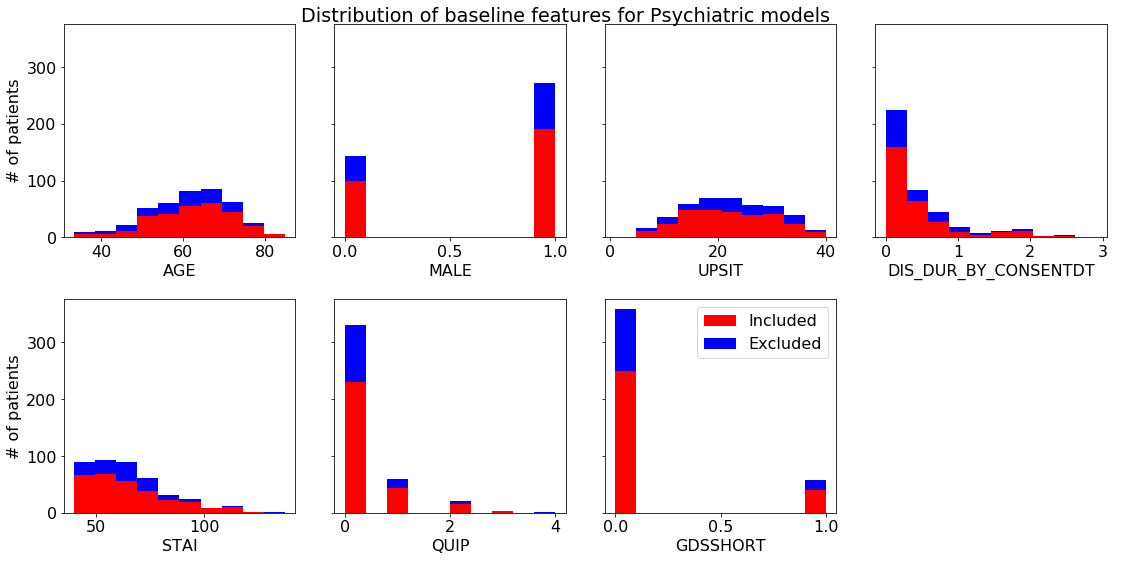

Sleep
331 patients included and 85 patients excluded due to missing baseline covariates
Among included patients, 0.6465 observed with 1.4007 (1.6803) years to observation and 4.7959 (1.7594) years to censoring
Among excluded patients, 0.5647 observed with 1.2595 (1.5296) years to observation and 4.1723 (2.1936) years to censoring


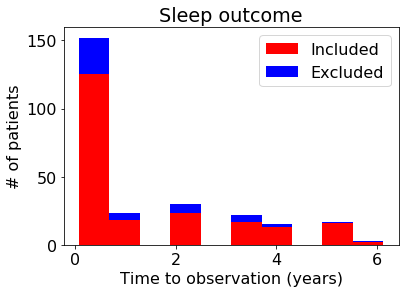

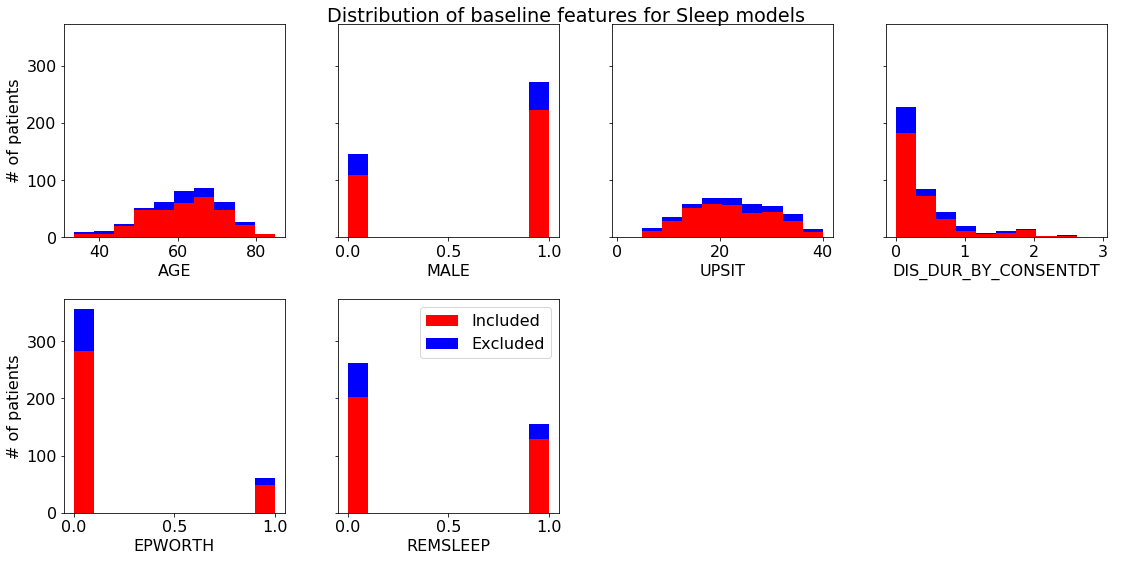

hybrid_requiremotor
268 patients included and 148 patients excluded due to missing baseline covariates
Among included patients, 0.5821 observed with 2.1296 (1.7366) years to observation and 4.6496 (1.8233) years to censoring
Among excluded patients, 0.4054 observed with 2.5326 (1.9401) years to observation and 4.5000 (1.9272) years to censoring


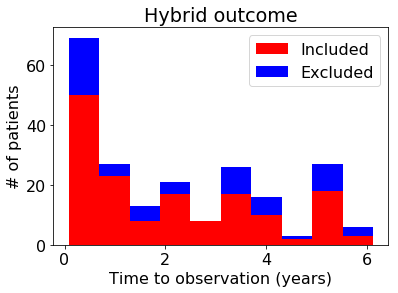

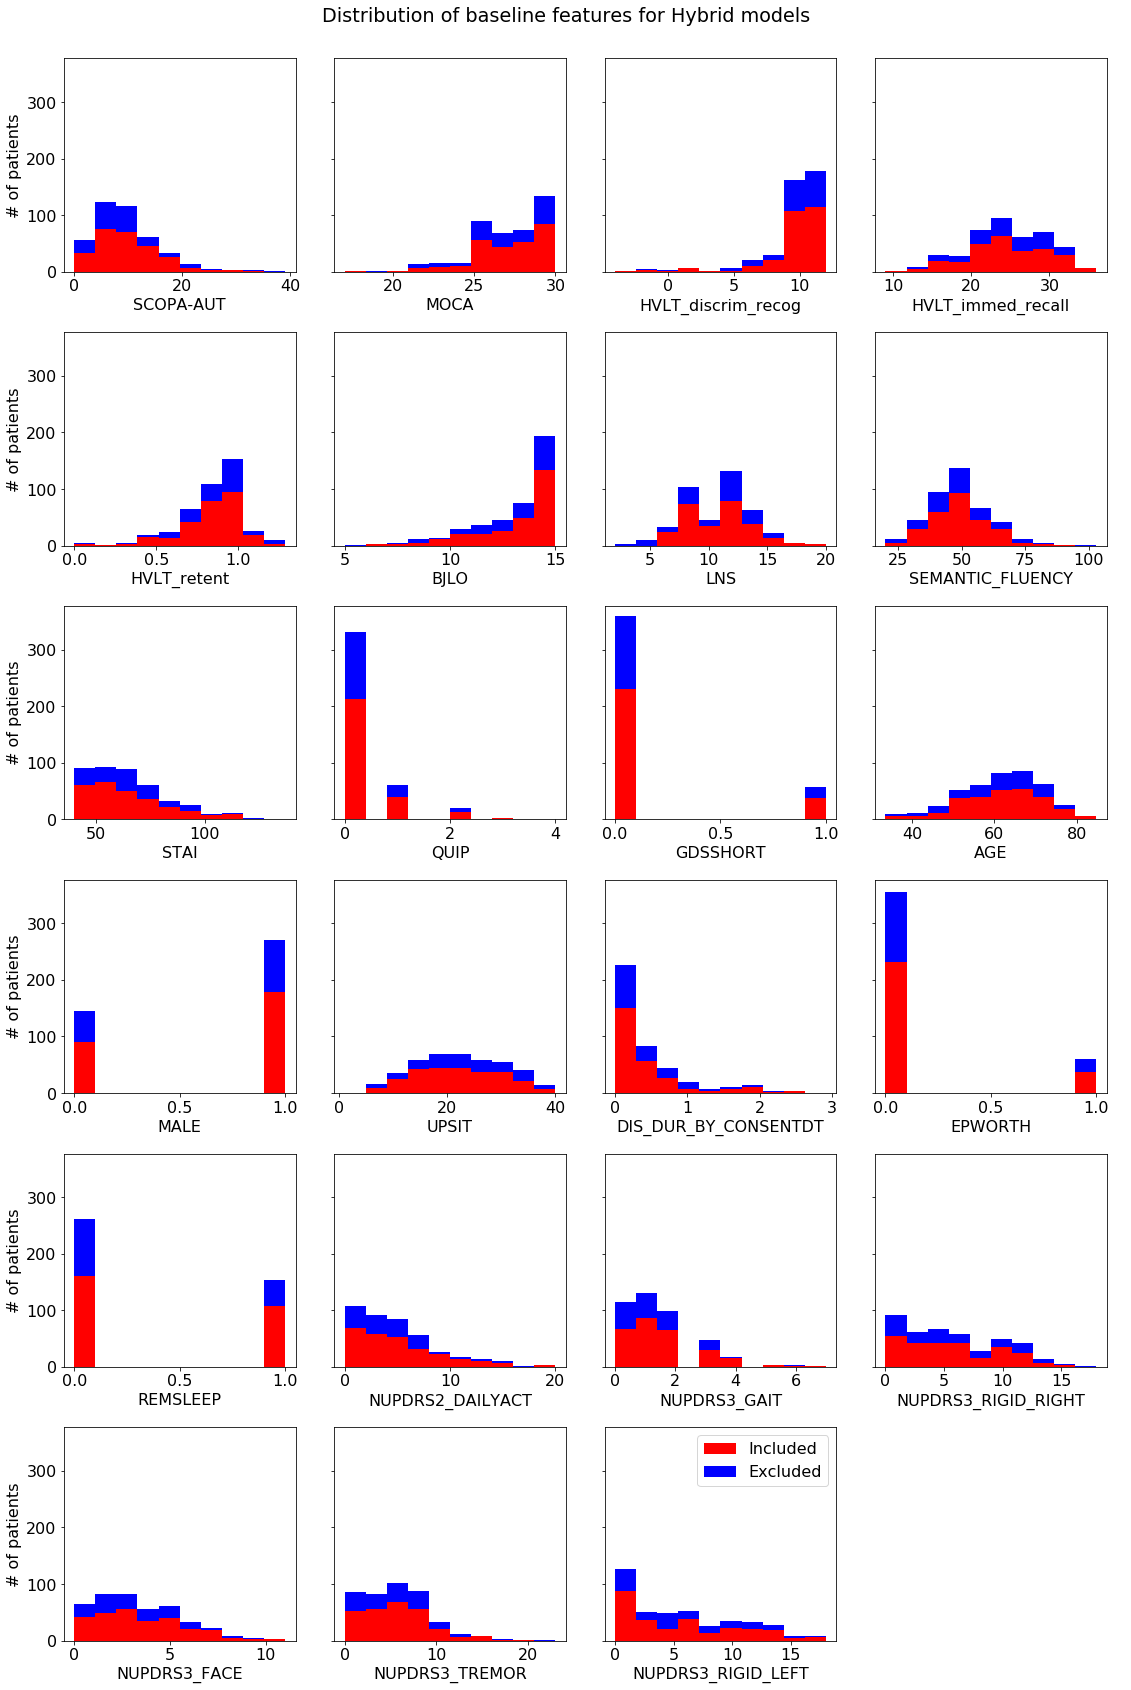

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
outcomes = ['Motor', 'Autonomic', 'Cognitive', 'Psychiatric', 'Sleep', 'hybrid_requiremotor']
for outcome in outcomes:
    print(outcome)
    selected_baseline_feats = list(union_of_covariate_sets[outcome])
    nonzero_outcome_df = outcome_df.loc[outcome_df[outcome + '_T']>0][['PATNO', outcome + '_T', outcome + '_E']]
    selected_baseline_df = selected_df[['PATNO']+selected_baseline_feats]
    nonzero_merged_df = nonzero_outcome_df.merge(selected_baseline_df, validate='one_to_one')
    nonzero_nomissing_merged_df = nonzero_merged_df.dropna()
    nomissing_patnos = nonzero_nomissing_merged_df.PATNO.values
    nonzero_hasmissing_merged_df = nonzero_merged_df.loc[~nonzero_merged_df['PATNO'].isin(nomissing_patnos)]
    # print # of patients in each, obs vs cens, avg times for both, distrib of obs times (stacked histogram)
    # set of histograms for distributions of each covariate selected
    print(str(len(nonzero_nomissing_merged_df)) + ' patients included and ' \
          + str(len(nonzero_hasmissing_merged_df)) + ' patients excluded due to missing baseline covariates')
    prop_obs_nomissing = nonzero_nomissing_merged_df[outcome+'_E'].sum()/float(len(nonzero_nomissing_merged_df))
    avg_obs_time_nomissing \
        = nonzero_nomissing_merged_df.loc[nonzero_nomissing_merged_df[outcome+'_E']==1][outcome+'_T'].mean()
    std_obs_time_nomissing \
        = nonzero_nomissing_merged_df.loc[nonzero_nomissing_merged_df[outcome+'_E']==1][outcome+'_T'].std()
    avg_cens_time_nomissing \
        = nonzero_nomissing_merged_df.loc[nonzero_nomissing_merged_df[outcome+'_E']==0][outcome+'_T'].mean()
    std_cens_time_nomissing \
        = nonzero_nomissing_merged_df.loc[nonzero_nomissing_merged_df[outcome+'_E']==0][outcome+'_T'].std()
    print('Among included patients, {0:.4f}'.format(prop_obs_nomissing) \
          + ' observed with {0:.4f}'.format(avg_obs_time_nomissing) + ' ({0:.4f})'.format(std_obs_time_nomissing) \
          + ' years to observation and {0:.4f}'.format(avg_cens_time_nomissing) \
          + ' ({0:.4f})'.format(std_cens_time_nomissing) + ' years to censoring')
    prop_obs_hasmissing = nonzero_hasmissing_merged_df[outcome+'_E'].sum()/float(len(nonzero_hasmissing_merged_df))
    avg_obs_time_hasmissing \
        = nonzero_hasmissing_merged_df.loc[nonzero_hasmissing_merged_df[outcome+'_E']==1][outcome+'_T'].mean()
    std_obs_time_hasmissing \
        = nonzero_hasmissing_merged_df.loc[nonzero_hasmissing_merged_df[outcome+'_E']==1][outcome+'_T'].std()
    avg_cens_time_hasmissing \
        = nonzero_hasmissing_merged_df.loc[nonzero_hasmissing_merged_df[outcome+'_E']==0][outcome+'_T'].mean()
    std_cens_time_hasmissing \
        = nonzero_hasmissing_merged_df.loc[nonzero_hasmissing_merged_df[outcome+'_E']==0][outcome+'_T'].std()
    print('Among excluded patients, {0:.4f}'.format(prop_obs_hasmissing) \
          + ' observed with {0:.4f}'.format(avg_obs_time_hasmissing) + ' ({0:.4f})'.format(std_obs_time_hasmissing) \
          + ' years to observation and {0:.4f}'.format(avg_cens_time_hasmissing) \
          + ' ({0:.4f})'.format(std_cens_time_hasmissing) + ' years to censoring')
    plt.hist([nonzero_nomissing_merged_df.loc[nonzero_nomissing_merged_df[outcome+'_E']==1][outcome+'_T'].values, \
              nonzero_hasmissing_merged_df.loc[nonzero_hasmissing_merged_df[outcome+'_E']==1][outcome+'_T'].values], \
             label=['Included', 'Excluded'], color=['red','blue'], stacked=True)
    plt.xlabel('Time to observation (years)')
    plt.ylabel('# of patients')
    if outcome == 'hybrid_requiremotor':
        outcome_title = 'Hybrid'
    else:
        outcome_title = outcome
    plt.title(outcome_title + ' outcome')
    plt.legend()
    plt.tight_layout()
    plt.savefig('final_inc_exc_' + outcome + '_obs_times.pdf')
    plt.show()
    # only plot standard set of features (i.e. those included in outcome)
    if outcome == 'hybrid_requiremotor':
        outcome_plot_feats = []
        for cov_set in standard.values():
            outcome_plot_feats += cov_set
    else:
        outcome_plot_feats = standard['Standard'] + standard[outcome]
    nrows = int((len(outcome_plot_feats)-1)/4)+1
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows*4), sharey=True)
    for idx in range(len(outcome_plot_feats)):
        feat_ax = ax[int(idx/4), int(idx%4)]
        feat_name = outcome_plot_feats[idx]
        feat_ax.hist([nonzero_nomissing_merged_df[feat_name].values, \
                      nonzero_hasmissing_merged_df[feat_name].dropna().values], \
                     label=['Included', 'Excluded'], color=['red','blue'], stacked=True)
        feat_ax.set_xlabel(human_readable_dict[feat_name])
        if idx%4 == 0:
            feat_ax.set_ylabel('# of patients')
    for idx in range(len(outcome_plot_feats), nrows*4):
        extra_ax = ax[int(idx/4), int(idx%4)]
        extra_ax.set_axis_off()
    feat_ax.legend()
    fig.suptitle('Distribution of baseline features for ' + outcome_title + ' models')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.savefig('final_inc_exc_' + outcome + '_baseline_distribs.pdf')
    plt.show()

More censoring in excluded set. May be because missing features means outcome can't be detected. Censoring and observation times about the same though.

In [111]:
# get stats from predict median
from lifelines.utils import concordance_index
def calc_maes(df, outcome):
    assert {outcome + '_T', outcome + '_E', outcome + '_T_pred'}.issubset(set(df.columns.values.tolist()))
    obs_df = df.loc[df[outcome + '_E']==1]
    cens_df = df.loc[df[outcome + '_E']==0]
    if len(obs_df) > 0:
        obs_mae = ((obs_df[outcome + '_T'] - obs_df[outcome + '_T_pred'])).abs().mean()
    else:
        obs_mae = 0
    if len(cens_df) > 0:
        cens_mae = np.mean(np.where(cens_df[outcome + '_T_pred'] < cens_df[outcome + '_T'], \
                           np.abs(cens_df[outcome + '_T_pred'] - cens_df[outcome + '_T']), 0))
    else:
        cens_mae = 0
    mae = (len(obs_df)*obs_mae + len(cens_df)*cens_mae)/len(df)
    return obs_mae, cens_mae, mae

def get_ci_mae(pred_df, outcome):
    ci = concordance_index(pred_df[outcome + '_T'], pred_df[outcome + '_T_pred'], pred_df[outcome + '_E'])
    _, _, mae = calc_maes(pred_df, outcome)
    return ci, mae

In [112]:
with open('final_test_patnos_dict.pkl', 'r') as f:
    test_patnos_dict = pickle.load(f)
outcome_filepath = '../ppmi_survival_models/survival_outcome_subtotals_gdsfixed_using_CMEDTM/set_3.0_0.5_2019Jul08/' \
    + 'cohorts_time_event_dict.pkl'
with open(outcome_filepath, 'r') as f:
    outcome_df = pickle.load(f)['PD']
outcomes = ['Motor', 'Autonomic', 'Cognitive', 'Psychiatric', 'Sleep', 'hybrid_requiremotor']
train_patnos_dict = dict()
for outcome in outcomes:
    nonzero_outcome_patnos = set(outcome_df.loc[outcome_df[outcome + '_T']>0].PATNO.values.tolist())
    train_patnos_dict[outcome] = np.array(list(nonzero_outcome_patnos.difference(test_patnos_dict[outcome])))

In [113]:
print('Metrics for predicting median observation time')
for outcome in outcomes:
    median_obs_time = outcome_df.loc[np.logical_and(outcome_df['PATNO'].isin(set(train_patnos_dict[outcome].tolist())), \
                                                    outcome_df[outcome + '_E']==1)][outcome + '_T'].quantile(q=0.5)
    test_df = outcome_df.loc[outcome_df['PATNO'].isin(set(test_patnos_dict[outcome].tolist()))]
    pred_df = test_df[[outcome + '_E', outcome + '_T']]
    pred_df[outcome + '_T_pred'] = median_obs_time
    ci, mae = get_ci_mae(pred_df, outcome)
    print(outcome + ': CI: {0:.4f}'.format(ci) + ', MAE: {0:.4f}'.format(mae))

Metrics for predicting median observation time
Motor: CI: 0.5000, MAE: 1.5119
Autonomic: CI: 0.5000, MAE: 2.0508
Cognitive: CI: 0.5000, MAE: 3.4000
Psychiatric: CI: 0.5000, MAE: 1.8958


/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Sleep: CI: 0.5000, MAE: 2.4067
hybrid_requiremotor: CI: 0.5000, MAE: 1.6389


In [114]:
print('Metrics for predicting median observation or censoring time')
for outcome in outcomes:
    median_obs_time = outcome_df.loc[outcome_df['PATNO'].isin(set(train_patnos_dict[outcome].tolist()))][outcome + '_T'].quantile(q=0.5)
    test_df = outcome_df.loc[outcome_df['PATNO'].isin(set(test_patnos_dict[outcome].tolist()))]
    pred_df = test_df[[outcome + '_E', outcome + '_T']]
    pred_df[outcome + '_T_pred'] = median_obs_time
    ci, mae = get_ci_mae(pred_df, outcome)
    print(outcome + ': CI: {0:.4f}'.format(ci) + ', MAE: {0:.4f}'.format(mae))

Metrics for predicting median observation or censoring time
Motor: CI: 0.5000, MAE: 1.7500
Autonomic: CI: 0.5000, MAE: 2.0085
Cognitive: CI: 0.5000, MAE: 1.4615
Psychiatric: CI: 0.5000, MAE: 1.7407


/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Sleep: CI: 0.5000, MAE: 2.1082
hybrid_requiremotor: CI: 0.5000, MAE: 1.8796


In [20]:
# Check why getting not a float error
selected_df = pd.read_csv('final_survival_baseline_data.csv')

In [21]:
for feat in selected_df.columns:
    if feat != 'PATNO':
        selected_df[feat] = (selected_df[feat] - selected_df[feat].min())/float(selected_df[feat].quantile(q=0.98) - selected_df[feat].quantile(q=0.02))

In [22]:
selected_df['TD'].min()

0.0

In [23]:
selected_df['TD'].max()

1.0

In [24]:
import matplotlib.pyplot as plt

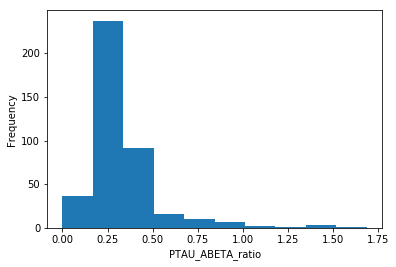

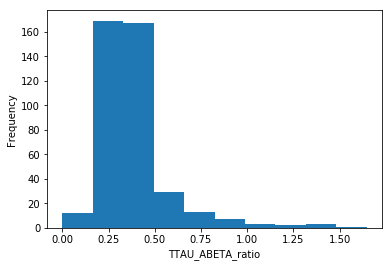

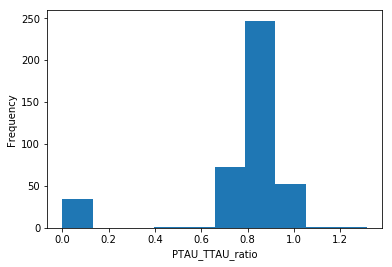

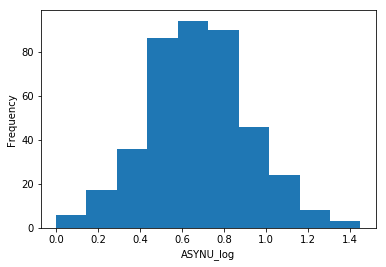

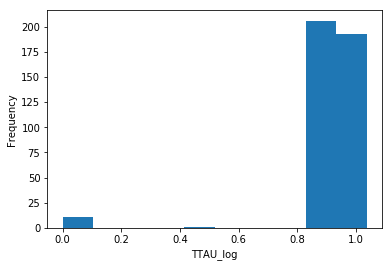

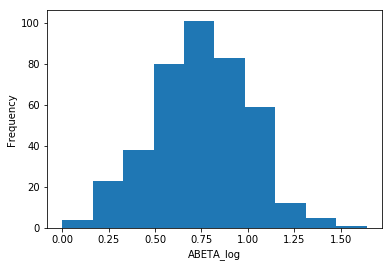

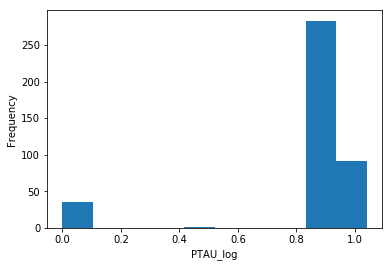

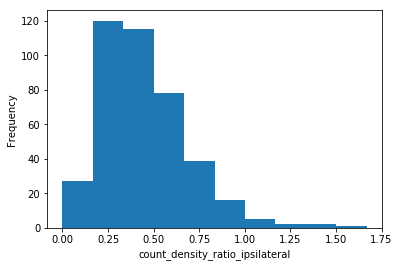

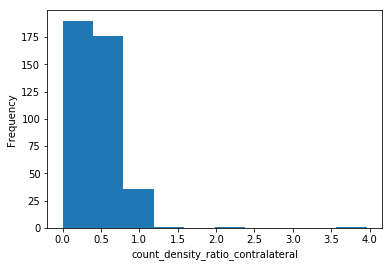

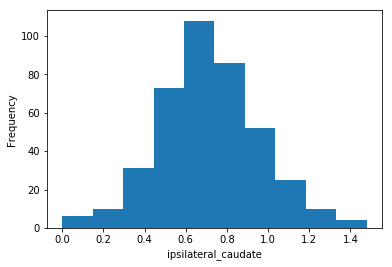

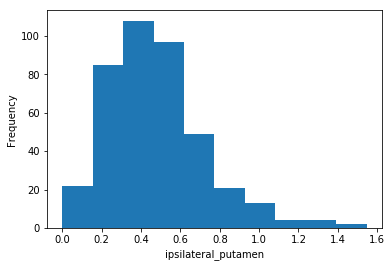

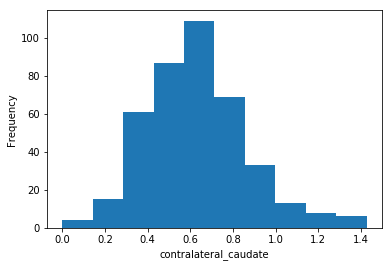

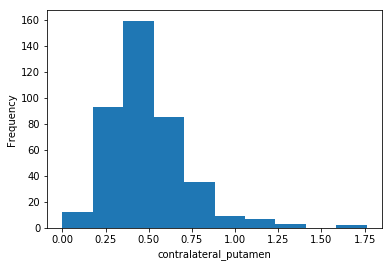

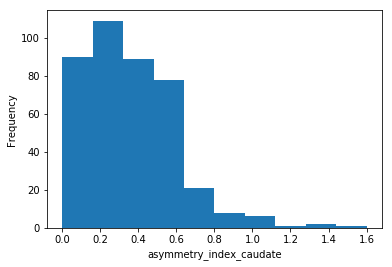

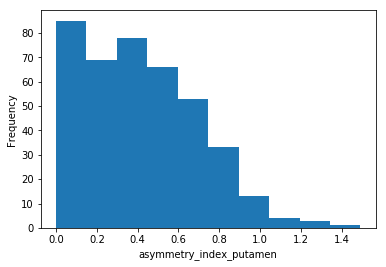

In [25]:
csf_feats = ['PTAU_ABETA_ratio', 'TTAU_ABETA_ratio', 'PTAU_TTAU_ratio', 'ASYNU_log', 'TTAU_log', 'ABETA_log', \
             'PTAU_log']
imaging_feats = ['count_density_ratio_ipsilateral', 'count_density_ratio_contralateral', \
                 'ipsilateral_caudate', 'ipsilateral_putamen', 'contralateral_caudate', 'contralateral_putamen', \
                 'asymmetry_index_caudate', 'asymmetry_index_putamen']
for col in csf_feats + imaging_feats:
    selected_df[col].plot.hist()
    plt.xlabel(col)
    plt.show()

In [ ]:
# doesn't help so forget it

In [46]:
selected_df = pd.read_csv('final_survival_baseline_data.csv')
for category in questions_plus_treatment_imaging_CSF_expanded.keys():
    for feat in questions_plus_treatment_imaging_CSF_expanded[category]:
        selected_df[feat] = (selected_df[feat] - selected_df[feat].min())/float(selected_df[feat].max() - selected_df[feat].min())
        print(feat + ':' + str(selected_df[feat].min()) + ', ' + str(selected_df[feat].max()))

MedHist_1i. gastrointestinal:0.0, 1.0
DIASUP:0.0, 1.0
DIASTND:0.0, 1.0
SYSSTND:0.0, 1.0
SYSSUP:0.0, 1.0
NP1URIN:0.0, 1.0
NP1LTHD:0.0, 1.0
NP1FATG:0.0, 1.0
NP1PAIN:0.0, 1.0
NP1CNST:0.0, 1.0
BMI:0.0, 1.0
DIGESTIVE AID:0.0, 1.0
SCAU_sexNA:0.0, 1.0
SCAU21:0.0, 1.0
SCAU26C:0.0, 1.0
SCAU26B:0.0, 1.0
SCAU26A:0.0, 1.0
SCAU19:0.0, 1.0
SCAU18:0.0, 1.0
SCAU15:0.0, 1.0
SCAU14:0.0, 1.0
SCAU17:0.0, 1.0
SCAU16:0.0, 1.0
SCAU10:0.0, 1.0
SCAU13:0.0, 1.0
SCAU12:0.0, 1.0
SCAU9:0.0, 1.0
SCAU1:0.0, 1.0
SCAU11:0.0, 1.0
SCAU8:0.0, 1.0
SCAU5:0.0, 1.0
SCAU4:0.0, 1.0
SCAU7:0.0, 1.0
SCAU6:0.0, 1.0
SCAU3:0.0, 1.0
SCAU2:0.0, 1.0
SCAU23A:0.0, 1.0
SCAU20:0.0, 1.0
SCAU22:0.0, 1.0
SCAU23:0.0, 1.0
SCAU24:0.0, 1.0
SCAU25:0.0, 1.0
NP1COG:0.0, 1.0
BJLOT1:0.0, 1.0
BJLOT3:0.0, 1.0
BJLOT5:0.0, 1.0
BJLOT7:0.0, 1.0
BJLOT9:0.0, 1.0
BJLOT11:0.0, 1.0
BJLOT13:0.0, 1.0
BJLOT15:0.0, 1.0
BJLOT17:0.0, 1.0
BJLOT19:0.0, 1.0
BJLOT21:0.0, 1.0
BJLOT23:0.0, 1.0
BJLOT25:0.0, 1.0
BJLOT27:0.0, 1.0
BJLOT29:0.0, 1.0
MCARHINO:0.0, 1.0
MCADATE:0.0,

In [45]:
del selected_df['PATNO']
print(selected_df.min())
print(selected_df.max())

UPSIT                                 0.000000
MALE                                  0.000000
RAWHITE                               0.000000
MedHist_1i. gastrointestinal          0.000000
DIS_DUR_BY_CONSENTDT                  0.000000
MedHist_1q. psychiatric               0.000000
PhysExam_Psychiatric                  0.000000
MOCA                                 17.000000
HVLT_discrim_recog                   -4.000000
HVLT_immed_recall                     9.000000
HVLT_retent                           0.000000
BJLO                                  5.000000
LNS                                   2.000000
SEMANTIC_FLUENCY                     20.000000
SCOPA-AUT                             0.000000
STAI                                 40.000000
QUIP                                  0.000000
GDSSHORT                              0.000000
EPWORTH                               0.000000
REMSLEEP                              0.000000
NUPDRS23                              4.000000
NP1COG       